In [1]:
from pymodules import sim_functions as sf
from pymodules.sim_functions import b2
import time
import json
import bson
from allensdk.core.swc import read_swc

In [2]:
def plot_morph(morph):
    for n in morph.compartment_list:
        for c in morph.children_of(n):
            b2.plot([n['x'], c['x']], [n['y'], c['y']], color='black')
            
    b2.xlabel('x')
    b2.ylabel('y')
    b2.show()

In [3]:
purkinje8 = read_swc("morphs/NMO_00892_depth8.swc")
purkinje13 = read_swc("morphs/NMO_00892_depth13.swc")
purkinje14 = read_swc("morphs/NMO_00892_depth14.swc")
purkinjefull = read_swc("morphs/NMO_00892_full.swc")
morph_set = [purkinje8, purkinje13, purkinje14, purkinjefull] 

In [4]:
prc_set = [0,1,2,3] 

In [5]:
cell = "NMO_00892"

In [6]:
with open(f"data/PRC_{cell}_depths.json") as json_file:
    data = json.load(json_file)

In [7]:
Δθ = b2.array(data['PRC'])
θin = b2.array(data['theta_in'])

In [8]:
with open(f"data/MLDS-reconstruct-prcs.json") as json_file:
    data_DS = json.load(json_file)

In [9]:
Δθ_DS = b2.array(data_DS['Δθ'])
θin_DS = b2.array(data_DS['θin'])

In [10]:
C = b2.get_cmap("viridis")
colors = [C(i*0.225) for i in range(5)]
alpha = 0.75

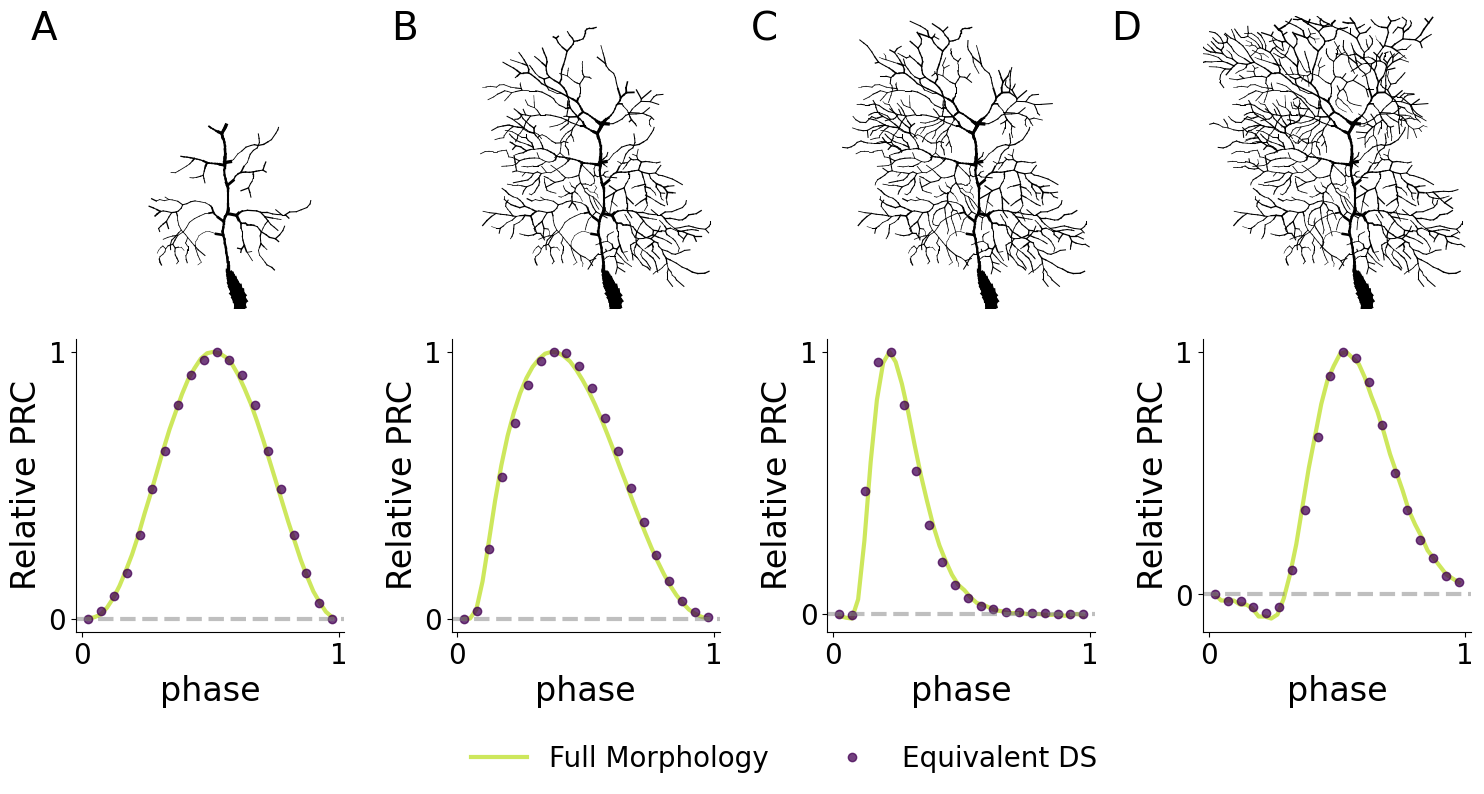

In [12]:
fig = b2.figure(figsize=(18.0, 8.0))

fig.subplots_adjust(wspace=0.4, hspace=0.1)

fig.text(0.1, 0.85, 'A', fontsize=28)
fig.text(0.3, 0.85, 'B', fontsize=28)
fig.text(0.5, 0.85, 'C', fontsize=28)
fig.text(0.7, 0.85, 'D', fontsize=28)

for i,j in enumerate(morph_set):
    ax = fig.add_subplot(241+i)
    for n in j.compartment_list:
            for c in j.children_of(n):
                b2.plot([n['x'], c['x']], [n['y'], c['y']], color='black', linewidth=n['radius'])
                
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_xlim([-80.0, 60.0])
    ax.set_ylim([0.0, 175.0])

for i,j in enumerate(prc_set):
    ax = fig.add_subplot(245+i)
    b2.plot(θin, Δθ[j,:]/max(Δθ[j,:]), "-", color=colors[4], alpha=alpha, linewidth=3.0, label="Full Morphology")
    b2.plot(θin_DS, Δθ_DS[:,j]/max(Δθ_DS[:,j]), "o", color=colors[0], alpha=alpha, linewidth=3.0, label="Equivalent DS")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if i==1:
        ax.legend(bbox_to_anchor = [2.5, -0.3], frameon=False, ncol=2, fontsize=20)
        ax.axes.yaxis.set_ticks([0, 1.0])
    else:
        ax.axes.yaxis.set_ticks([0, 1.0])
    
    ax.axes.xaxis.set_ticks([0, 1])
    b2.xticks(fontsize=20)
    b2.yticks(fontsize=20)
    b2.axhline(y=0, color='gray', ls='--', lw=3.0, alpha=0.5)
    b2.xlabel("phase", fontsize=24)
    b2.ylabel("Relative PRC", fontsize=24)
    
b2.savefig(f"figures/figure-6.svg", bbox_inches="tight")